In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

#importo libreria
import sys
sys.path.append('Config')
from lablib import *


In [2]:
#definisco le varie funzioni
def gauss(x, mu, sigma, a):
    return a * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def gauss_cost(x, mu, sigma, a, cost):
    return gauss(x, mu, sigma, a) + cost

def gauss_pol2(x, mu, sigma, a, b, c, cost):
    return gauss(x, mu, sigma, a) + b*x + c * x**2 + cost

def gauss_exp(x, mu, sigma, a, b):
    return gauss(x, mu, sigma, a) + b * np.exp(-x) 

def gauss_pol3 (x, mu, sigma, a, b, c, cost, d):
    return gauss_pol2(x, mu, sigma, a, b, c, cost) + d* x**3

# SODIO

Text(0.5, 1.0, 'Cristallo BGO Sodio')

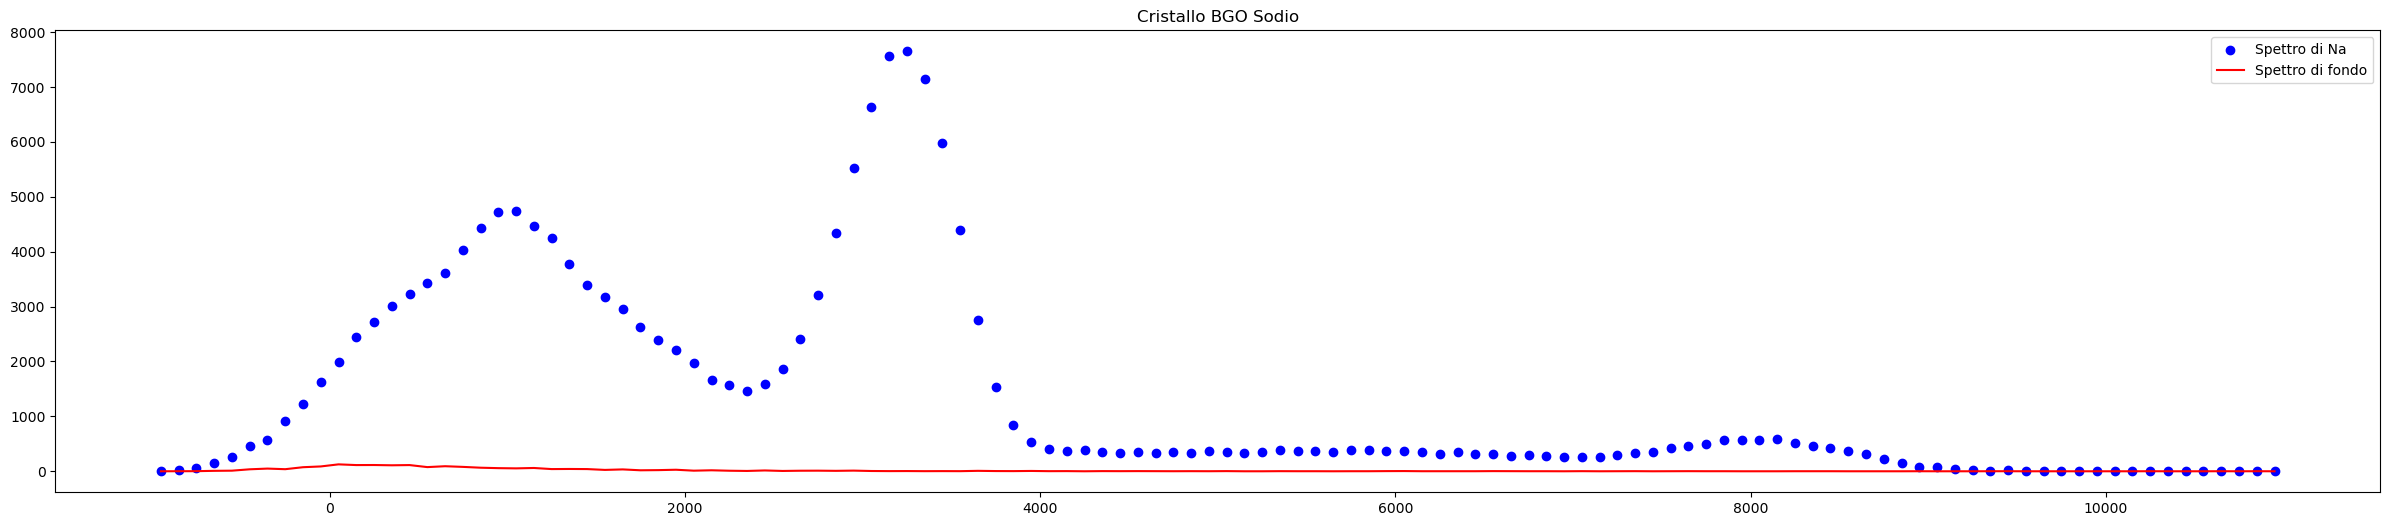

In [3]:
#prendo i dati
df = pd.read_csv('Dati/Parte 2/BGO/Sodio_55.5V.txt', delim_whitespace= True, skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = True, header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])
fig, ax = plt.subplots(figsize = (30,6))
plt.scatter(df['ADC'][:120], df['Counts'][:120], label = 'Spettro di Na', color = 'blue')
plt.plot(df_bkg['ADC'][:120], df_bkg['Counts'][:120], label = 'Spettro di fondo', color = 'red')
plt.legend()
plt.title('Cristallo BGO Sodio')

## Primo picco

In [4]:
start_index = 35
end_index = 51
df_primo_picco_sodio = df.iloc[start_index:end_index]
err_primo_picco_sodio = np.array(np.sqrt(df_primo_picco_sodio['Counts'][:]))
#print(err_primo_picco_sodio)


In [5]:
pars, vals, ers, *other = LS_fit(df_primo_picco_sodio['ADC'], df_primo_picco_sodio['Counts'], err_primo_picco_sodio, gauss, mu = 3170, sigma = 350, a = 7400 )

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 523 (χ²/ndof = 40.2)       │              Nfcn = 76               │
│ EDM = 2.44e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 3.1793e3  │ 0.0015e3  │            │            │         │         │       │
│ 1 │ sigma │   337.2   │    1.3    │            │            │         │         │       │
│ 2 │ a     │  7.55e3   │  0.04e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │       mu    sigma        a │
├───────┼────────────────────────────┤
│    mu │     2.38     -0.7     11.1 │
│ sigma │     -0.7      1.8    -34.1 │
│     a │     11.1    -34.1 1.57e+03 │
└───────┴────────────────────────────┘

In [6]:
for i in range(len(vals)):
    print(f'{pars[i]} = {vals[i]} +/- {ers[i]}')

mu = 3179.306893746671 +/- 1.5431672400803904
sigma = 337.2397754390937 +/- 1.3401664976636143
a = 7551.432081851714 +/- 39.58330315029844


## Secondo picco

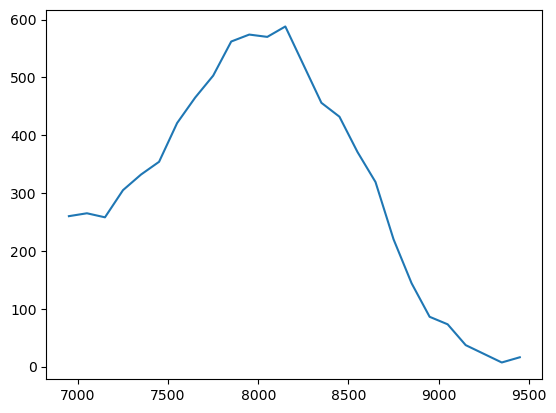

In [7]:
start_index = 79
end_index = 105
df_secondo_picco_sodio = df.iloc[start_index : end_index]
err_secondo_picco_sodio = np.array(np.sqrt(df_secondo_picco_sodio['Counts']))
plt.plot(df_secondo_picco_sodio['ADC'], df_secondo_picco_sodio['Counts'])
#print(df_secondo_picco_sodio)

In [8]:
pars, vals, errs, *others = LS_fit(df_secondo_picco_sodio['ADC'], df_secondo_picco_sodio['Counts'], err_secondo_picco_sodio, gauss, mu = 8000, sigma = 350, a = 500)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 223.2 (χ²/ndof = 9.7)      │              Nfcn = 101              │
│ EDM = 9.95e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  7.908e3  │  0.008e3  │            │            │         │         │       │
│ 1 │ sigma │    561    │     6     │            │            │         │         │       │
│ 2 │ a     │    587    │     8     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │    mu sigma     a │
├───────┼───────────────────┤
│    mu │  71.5   -30    20 │
│ sigma │   -30  36.5   -30 │
│     a │    20   -30  67.3 │
└───────┴───────────────────┘

# COBALTO

Text(0.5, 1.0, 'Cristallo BGO Cobalto')

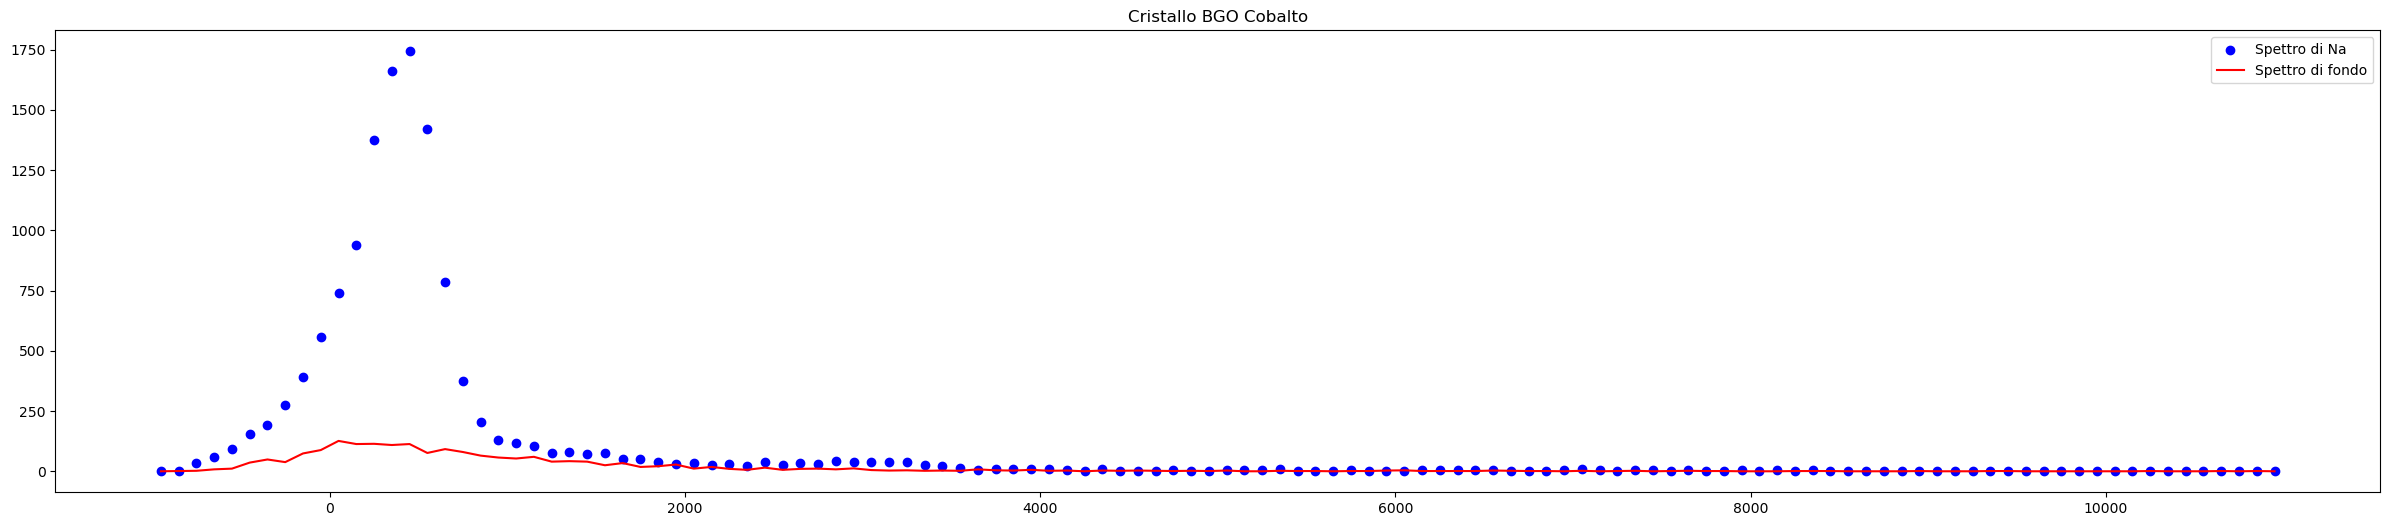

In [9]:
# prendo i dati
df = pd.read_csv('Dati/Parte 2/BGO/Cobalto_55.5V_bins100.txt', delim_whitespace= 'True', skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = 'True', header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])
fig, ax = plt.subplots(figsize = (30,6))
plt.scatter(df['ADC'][:120], df['Counts'][:120], label = 'Spettro di Na', color = 'blue')
plt.plot(df_bkg['ADC'][:120], df_bkg['Counts'][:120], label = 'Spettro di fondo', color = 'red')
plt.legend()
plt.title('Cristallo BGO Cobalto')

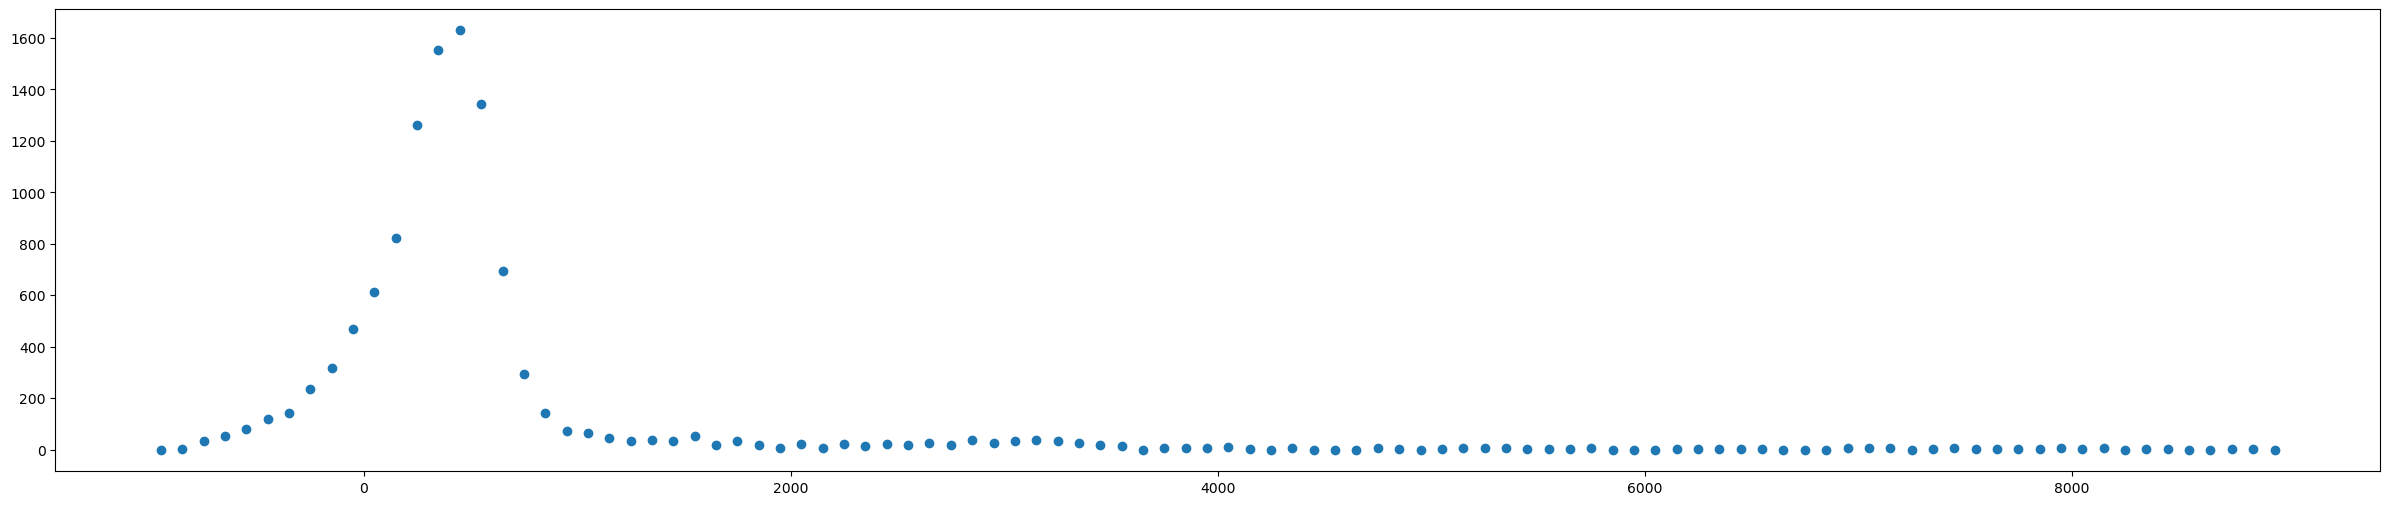

In [10]:
filtrato = df['Counts'][0:100] - df_bkg['Counts'][0:100]
#print(df_filtrato['Counts'][:])
fig, ax = plt.subplots(figsize = (30,6))
plt.scatter(df['ADC'][0:100], filtrato)
start_index = 6
end_index = 25
# filtrato = df.iloc[start_index:end_index]
#df_bkg = df_bkg[start_index:end_index]
err_filtrato = np.array(np.sqrt(filtrato[start_index:end_index]) + np.sqrt(df_bkg['Counts'][start_index:end_index]))


In [11]:
pars, vals, ers, *other = LS_fit(df['ADC'][start_index:end_index], filtrato[start_index:end_index], err_filtrato, gauss_cost, mu = 500, sigma = 250, a  = 1000, cost = 70)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 217.1 (χ²/ndof = 14.5)     │              Nfcn = 130              │
│ EDM = 8.16e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    359    │     4     │            │            │         │         │       │
│ 1 │ sigma │    228    │     5     │            │            │         │         │       │
│ 2 │ a     │  1.493e3  │  0.030e3  │            │            │         │         │       │
│ 3 │ cost  │    52     │     6     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────┐
│       │    mu sigma     a  cost │
├───────┼─────────────────────────┤
│    mu │  19.3   -10    40     5 │
│ sigma │   -10  21.5   -82   -14 │
│     a │    40   -82   881    10 │
│  cost │     5   -14    10    34 │
└───────┴─────────────────────────┘

In [12]:
for i in range(len(vals)):
    print(f'{pars[i]} = {vals[i]} +/- {ers[i]}')

mu = 358.8892573062336 +/- 4.387754460789217
sigma = 227.817278151868 +/- 4.634361554561522
a = 1493.1858076643996 +/- 29.68866546661103
cost = 51.77026626696946 +/- 5.828181498164668
